## Question 2

### a)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
p = np.array(([0.18, 0.22, 0.25, 0.35]))
a = np.array(([-0.05, 0.12, 0.3, 0.22]))
b = np.array(([0.18, -0.08, 0.16, 0.16]))
c = np.array(([-0.12, 0.12, -0.06, 0.04]))

ec = np.dot(p, c.T)
ea = np.dot(a, a.T)
eb = np.dot(b, b.T)

In [28]:
vara = np.dot(p, (a.T - np.dot(p, a.T)) ** 2)
varb = np.dot(p, (b.T - np.dot(p, b.T)) ** 2)
varc = np.dot(p, (c.T - np.dot(p, c.T)) ** 2)


In [29]:
print('Asset','ExpectedReturn','Variance','SD')
print('A   ',ea,vara,vara**0.5)
print('B   ',eb,varb,varb**0.5)
print('C   ',ec,varc,varc**0.5)

Asset ExpectedReturn Variance SD
A    0.1553 0.014361639999999998 0.11984006008009174
B    0.09 0.010323360000000002 0.1016039369315973
C    0.0038000000000000013 0.007205560000000001 0.08488557003401698


### b)

In [30]:

covab = np.dot(p, (a * b).T) - np.dot(p, a.T) * np.dot(p, b.T)
covbc = np.dot(p, (b * c).T) - np.dot(p, b.T) * np.dot(p, c.T)
covac = np.dot(p, (a * c).T) - np.dot(p, c.T) * np.dot(p, a.T)


In [31]:
def cal(a, b):
    return ((np.dot(p, (a * b).T) - np.dot(p, a.T) * np.dot(p, b.T)) / (np.dot(p, (b.T - np.dot(p, b.T)) ** 2)) ** 0.5 /
           (np.dot(p, (a.T - np.dot(p, a.T)) ** 2)) ** 0.5)


corab = cal(a, b)
corbc = cal(b, c)
corac = cal(a, c)

In [32]:
print('AB',covab,corab)
print('BC',covbc,corbc)
print('AC',covac,corac)

AB 0.0018184800000000043 0.14934681824956064
BC -0.00658104 -0.7630449541639325
AC 0.0021842800000000002 0.21471996205070912


### c)

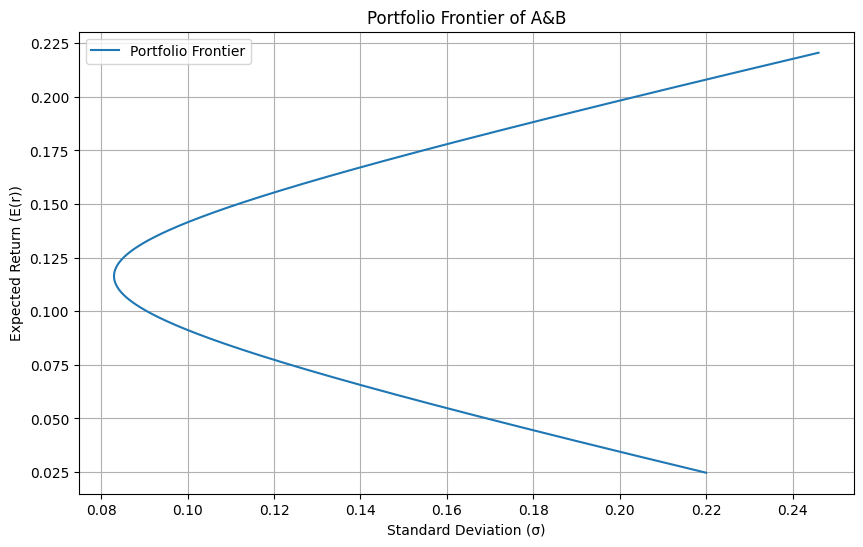

In [33]:
w_a = np.linspace(-1, 2, 500)
w_b = 1 - w_a

# Portfolio expected return and standard deviation
E_rp = w_a * ea + w_b * eb
sigma_p = np.sqrt(w_a**2 * vara + w_b**2 * varb + 2 * w_a * w_b * covab)

plt.figure(figsize=(10, 6))
plt.plot(sigma_p, E_rp, label='Portfolio Frontier')
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (E(r))')
plt.title('Portfolio Frontier of A&B')
plt.legend()
plt.grid(True)
plt.show()

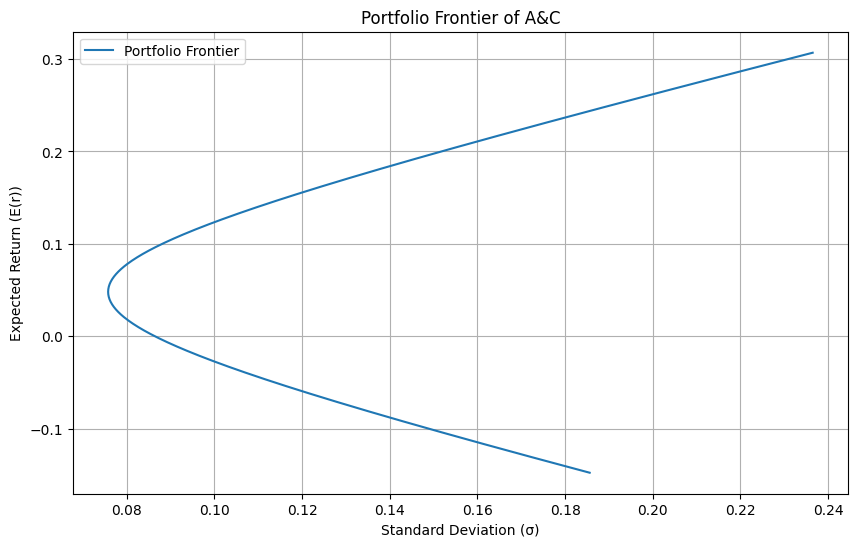

In [34]:
w_a = np.linspace(-1, 2, 500)
w_b = 1 - w_a

# Portfolio expected return and standard deviation
E_rp = w_a * ea + w_b * ec
sigma_p = np.sqrt(w_a**2 * vara + w_b**2 * varc + 2 * w_a * w_b * covac)

plt.figure(figsize=(10, 6))
plt.plot(sigma_p, E_rp, label='Portfolio Frontier')
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (E(r))')
plt.title('Portfolio Frontier of A&C')
plt.legend()
plt.grid(True)
plt.show()

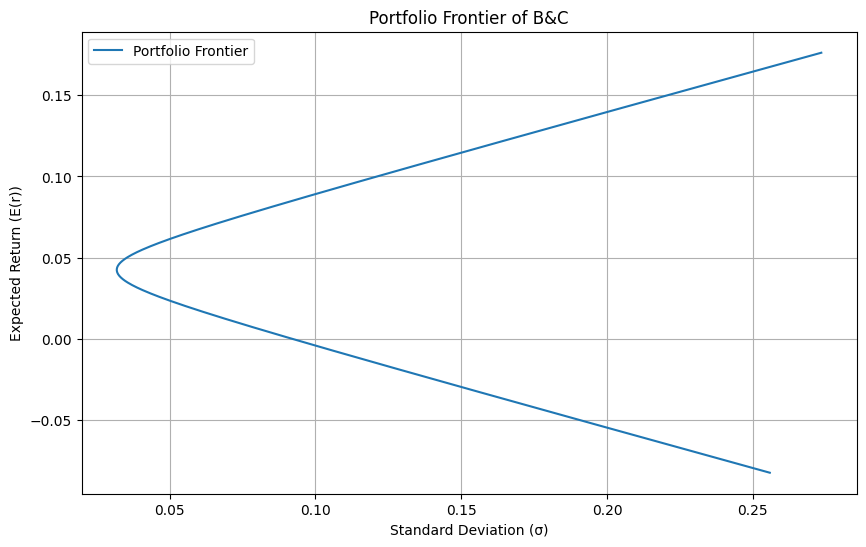

In [35]:
w_a = np.linspace(-1, 2, 500)
w_b = 1 - w_a

# Portfolio expected return and standard deviation
E_rp = w_a * eb + w_b * ec
sigma_p = np.sqrt(w_a**2 * varb + w_b**2 * varc + 2 * w_a * w_b * covbc)

plt.figure(figsize=(10, 6))
plt.plot(sigma_p, E_rp, label='Portfolio Frontier')
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (E(r))')
plt.title('Portfolio Frontier of B&C')
plt.legend()
plt.grid(True)
plt.show()

## Question 3

The equation is $ E(p) = w_aE(r_a) + (1-w_a)E(r_b) $, $\sigma_p = \sqrt{w_a^2 \sigma(r_a)^2 + w_b^2 \sigma(r_b)^2 + 2 w_a w_b \rho_{a,b} \sigma(r_a) \sigma(r_b)}$

The min-variance portfolio is calculated as below.
$$
w_a^{\text{GMV}} = \frac{\sigma(r_b)^2 - \rho_{a,b} \cdot \sigma(r_a) \cdot \sigma(r_b)}{\sigma(r_a)^2 + \sigma(r_b)^2 - 2 \rho_{a,b} \cdot \sigma(r_a) \cdot \sigma(r_b)}
$$
$$w_a^{\text{GMV}} = \frac{(0.0265)^2 - 0.3774 \cdot 0.015 \cdot 0.0265}{(0.015)^2 + (0.0265)^2 - 2 \cdot 0.3774 \cdot 0.015 \cdot 0.0265}$$
$$w_a = 0.88$$
$$
w_b^{\text{GMV}} = 1 - w_a^{\text{GMV}} = 0.12
$$



$$
E(r_p^{\text{GMV}}) = w_a^{\text{GMV}} \cdot E(r_a) + w_b^{\text{GMV}} \cdot E(r_b) = 0.03
$$

$$
\sigma(r_p^{\text{GMV}}) = \sqrt{(w_a^{\text{GMV}})^2 \cdot \sigma(r_a)^2 + (w_b^{\text{GMV}})^2 \cdot \sigma(r_b)^2 + 2 w_a^{\text{GMV}} w_b^{\text{GMV}} \cdot \rho_{a,b} \cdot \sigma(r_a) \cdot \sigma(r_b)} = 0.0147
$$

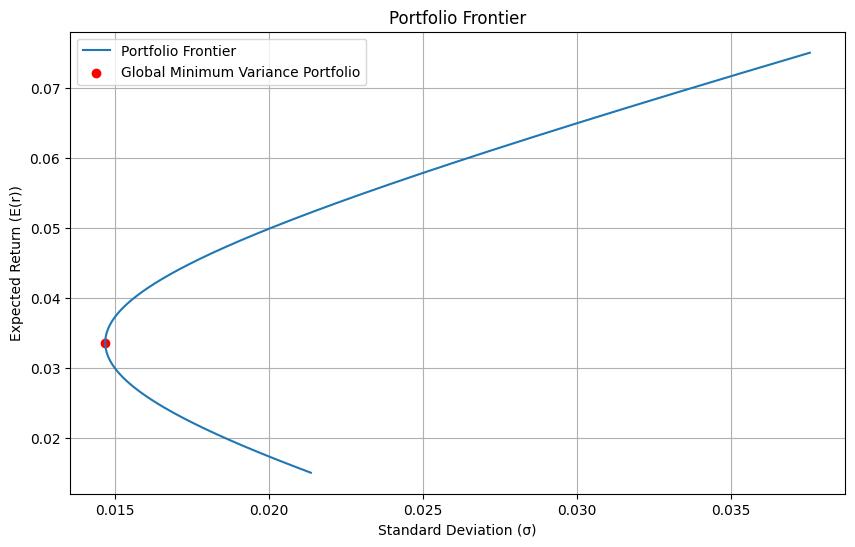

In [36]:

E_ra = 0.03
sigma_a = 0.015
E_rb = 0.06
sigma_b = 0.0265
rho_ab = 0.3774

cov_ab = rho_ab * sigma_a * sigma_b

w_a = np.linspace(-0.5, 1.5, 500)
w_b = 1 - w_a

E_rp = w_a * E_ra + w_b * E_rb
sigma_p = np.sqrt(w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * cov_ab)

#min-variance
w_a_gmv = (sigma_b**2 - cov_ab) / (sigma_a**2 + sigma_b**2 - 2 * cov_ab)
w_b_gmv = 1 - w_a_gmv
E_rp_gmv = w_a_gmv * E_ra + w_b_gmv * E_rb
sigma_p_gmv = np.sqrt(w_a_gmv**2 * sigma_a**2 + w_b_gmv**2 * sigma_b**2 + 2 * w_a_gmv * w_b_gmv * cov_ab)


plt.figure(figsize=(10, 6))
plt.plot(sigma_p, E_rp, label='Portfolio Frontier')
plt.scatter(sigma_p_gmv, E_rp_gmv, color='red', label='Global Minimum Variance Portfolio')
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (E(r))')
plt.title('Portfolio Frontier')
plt.legend()
plt.grid(True)
plt.show()

## Question 4

The equation is $ E(p) = w_fE(r_f) + (1-w_f)E(r_M) $, $\sigma_p = \sqrt{w_f^2 \sigma(r_f)^2 + (1-w_f)^2 \sigma(r_M)^2 + 2 w_f (1-w_f) \rho_{f,M} \sigma(r_f) \sigma(r_M)}$

$ E(p) = 0.04w_f + 0.12(1-w_f) $, $\sigma_p = \sqrt{(1-w_f)^2 0.06^2}$

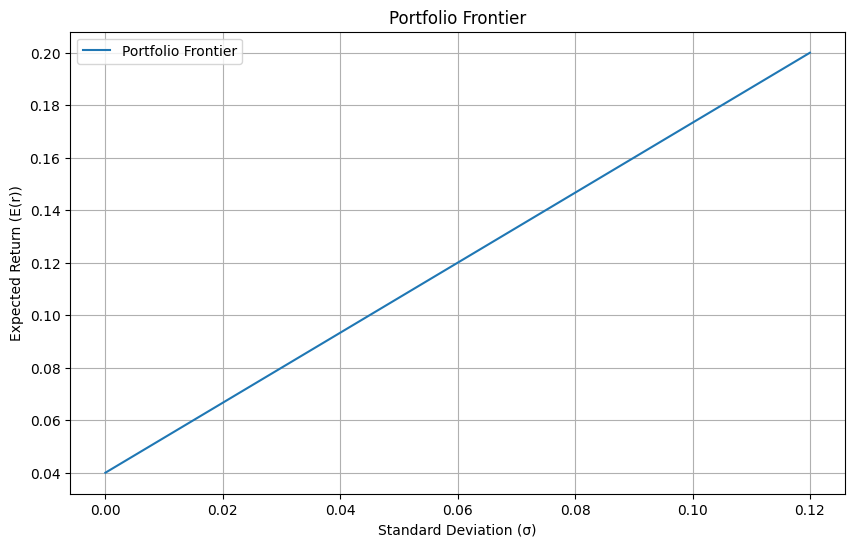

In [37]:
w_a = np.linspace(-1, 1, 500)
w_b = 1 - w_a

E_rp = w_a * 0.04 + w_b * 0.12
sigma_p = np.sqrt( w_b**2 * 0.06**2)

plt.figure(figsize=(10, 6))
plt.plot(sigma_p, E_rp, label='Portfolio Frontier')
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (E(r))')
plt.title('Portfolio Frontier')
plt.legend()
plt.grid(True)
plt.show()

We have $0.16 = w_f * 0.04 + (1-w_f) * 0.12$, so $w_f = -0.5$. Therefore, we borrow 25000 (namely negative risk-free asset) and invest 75000 into the risky assets portfolio M.